In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Training and Testing Data
=====================================

To evaluate how well our supervised models generalize, we can split our data into a training and a test set:

<img src="figures/train_test_split_matrix.svg" width="100%">

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

Thinking about how machine learning is normally performed, the idea of a train/test split makes sense. Real world systems train on the data they have, and as other data comes in (from customers, sensors, or other sources) the classifier that was trained must predict on fundamentally *new* data. We can simulate this during training using a train/test split - the test data is a simulation of "future data" which will come into the system during production. 

Specifically for iris, the 150 labels in iris are sorted, which means that if we split the data using a proportional split, this will result in fudamentally altered class distributions. For instance, if we'd perform a common 2/3 training data and 1/3 test data split, our training dataset will only consists of flower classes 0 and 1 (Setosa and Versicolor), and our test set will only contain samples with class label 2 (Virginica flowers).

Under the assumption that all samples are independent of each other (in contrast time series data), we want to **randomly shuffle the dataset before we split the dataset** as illustrated above.

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Now we need to split the data into training and testing. Luckily, this is a common pattern in machine learning and scikit-learn has a pre-built function to split data into training and testing sets for you. Here, we use 50% of the data as training, and 50% testing. 80% and 20% is another common split, but there are no hard and fast rules. The most important thing is to fairly evaluate your system on data it *has not* seen during training!

In [4]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123)
print("Labels for training data:")
print(train_y)

Labels for training data:
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]


In [5]:
print("Labels for test data:")
print(test_y)

Labels for test data:
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


---

**Tip: Stratified Split**

Especially for relatively small datasets, it's better to stratify the split. Stratification means that we maintain the original class proportion of the dataset in the test and training sets. For example, after we randomly split the dataset as shown in the previous code example, we have the following class proportions in percent:

In [6]:
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [30.66666667 40.         29.33333333]
Test: [36.         26.66666667 37.33333333]


So, in order to stratify the split, we can pass the label array as an additional option to the `train_test_split` function:

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


---

By evaluating our classifier performance on data that has been seen during training, we could get false confidence in the predictive power of our model. In the worst case, it may simply memorize the training samples but completely fails classifying new, similar samples -- we really don't want to put such a system into production!

Instead of using the same dataset for training and testing (this is called "resubstitution evaluation"), it is much much better to use a train/test split in order to estimate how well your trained model is doing on new data.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Fraction Correct [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction Correct [Accuracy]:
0.96


We can also visualize the correct predictions ...

In [15]:
print('Samples correctly classified:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

Samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]


... as well as the failed predictions

In [16]:
print('Samples incorrectly classified:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

Samples incorrectly classified:
[44 49 60]


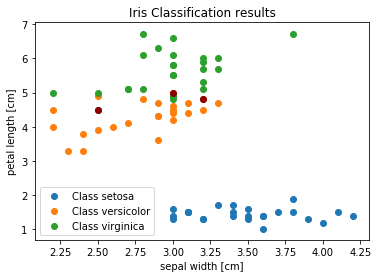

In [17]:
# Plot two dimensions

for n in np.unique(test_y):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], label="Class %s" % str(iris.target_names[n]))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

We can see that the errors occur in the area where green (class 1) and gray (class 2) overlap. This gives us insight about what features to add - any feature which helps separate class 1 and class 2 should improve classifier performance.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Print the true labels of 3 wrong predictions and modify the scatterplot code, which we used above, to visualize and distinguish these three samples with different markers in the 2D scatterplot. Can you explain why our classifier made these wrong predictions?
      </li>
    </ul>
</div>

44: Predicted 2 True label 1
49: Predicted 2 True label 1
60: Predicted 1 True label 2


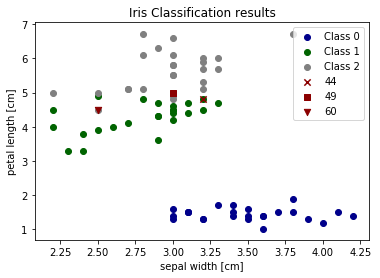

In [18]:
# %load solutions_1/04_wrong-predictions.py
for i in incorrect_idx:
    print('%d: Predicted %d True label %d' % (i, pred_y[i], test_y[i]))

# Plot two dimensions

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2],
                color=color, label="Class %s" % str(n))

for i, marker in zip(incorrect_idx, ['x', 's', 'v']):
    plt.scatter(test_X[i, 1], test_X[i, 2],
                color="darkred",
                marker=marker,
                s=40,
                label=i)

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=1, scatterpoints=1)
plt.title("Iris Classification results")
plt.show()


## Basic use-case: train and test a classifier

In [5]:
import matplotlib.pyplot as plt

For this example, we will train and test a classifier on a dataset. We will use this example to recall the API of `scikit-learn`.

We will use the `digits` dataset which is a dataset of hand-written digits.

In [6]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

Each row in X contains the intensities of the 64 image pixels. For each sample in X, we get the ground-truth y indicating the digit written.

The digit in the image is 0


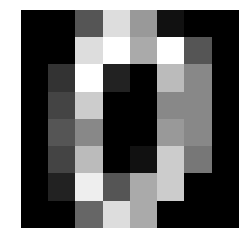

In [7]:
plt.imshow(X[0].reshape(8, 8), cmap='gray');
plt.axis('off')
print('The digit in the image is {}'.format(y[0]))

In machine learning, we should check our model by training and testing it on distinct sets of data. `train_test_split` is a utility function to split the data into two independent sets.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Once we have independent training and testing sets, we can learn a machine learning model using the `fit` method. We will use the `score` method to test this method, relying on the default accuracy metric.

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.95


The API of `scikit-learn` is consistent across classifiers. Thus, we can easily replace the `LogisticRegression` classifier by a `RandomForestClassifier`. These changes are minimal and only related to the creation of the classifier instance.

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the RandomForestClassifier is 0.96


##  preprocess the data before training and testing a classifier

### Standardize your data

Preprocessing might be required before learning a model. For instance, a user could be interested in creating hand-craft features or an algorithm might make some apriori on the data. In our case, the solver used by the LogisticRegression expects the data to be normalized. Thus, we need to standardize the data before training the model. To observe this necessary condition, we will check the number of iterations required to train the model.

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)
print('{} required {} iterations to be fitted'.format(clf.__class__.__name__, clf.n_iter_[0]))

LogisticRegression required 2153 iterations to be fitted


`StandardScaler` is used to standardize the data. This scaler should be applied in the following way: learn (i.e., `fit` method) the statistics on a training set and standardized (i.e., `transform` method) the training and testing sets. Finally, we will train and test the model and the scaled datasets.

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
accuracy = clf.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))
print('{} required {} iterations to be fitted'.format(clf.__class__.__name__, clf.n_iter_[0]))

Accuracy score of the LogisticRegression is 0.96
LogisticRegression required 186 iterations to be fitted


By scaling the data, the convergence of the model happened after only 89 iterations instead of 1493 iterations before.

### When more is better than less: cross-validation instead of single split

Splitting the data is necessary to evaluate the statistical model performance. However, it reduces the number of samples which can be used to learn the model. Therefore, one should use a cross-validation set whenever possible. Having multiple splits will give information about the model stability as well. `scikit-learn` provides three functions: `cross_val_score`, `cross_val_predict`, and `cross_validate`. The two former functions are a specific case of the latter one. Thus, we will focus on the latter.

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto',
                                        max_iter=1000, random_state=42))
scores = cross_validate(pipe, X, y, cv=3, return_train_score=True)

Using the cross-validate functions, we can quickly check the training and testing scores and make fast plot using `pandas`.

In [21]:
import pandas as pd

df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_score,train_score
0,0.428248,0.000000,0.926544,0.988314
1,0.417355,0.005100,0.943239,0.984975
2,0.427111,0.004011,0.924875,0.993322


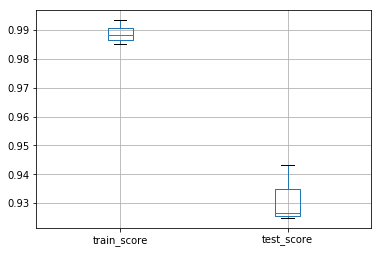

In [22]:
df_scores[['train_score', 'test_score']].boxplot()